In [1]:
import catboost as cb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 解决中文乱码问题
plt.rcParams["font.sans-serif"]=["SimHei"] 
plt.rcParams["axes.unicode_minus"]=False 

In [2]:
Cat_train=[]
Cat_test=[]
ETR_train=[]
ETR_test=[]
RFR_train=[]
RFR_test=[]
XGB_train=[]
XGB_test=[]

In [3]:
Cat_train_1=[]
Cat_test_1=[]
ETR_train_1=[]
ETR_test_1=[]
RFR_train_1=[]
RFR_test_1=[]
XGB_train_1=[]
XGB_test_1=[]

In [4]:
data=pd.read_excel('./use.xlsx')
for i in range(9):
    train_data,test_data=train_test_split(data,test_size=(9-i)/10, random_state=1112)
    feature=train_data.drop(['Y','Unnamed: 0'],axis=1)
    label=train_data['Y']
    test_x = test_data.drop(['Y','Unnamed: 0'],axis=1)
    test_y = test_data['Y']
    kfold = KFold(n_splits = 5, random_state = 1314, shuffle = True)
    model = cb.CatBoostRegressor(iterations=970,subsample=0.58,max_depth=10,l2_leaf_reg=3.680600849975441,silent=True,
                                 random_state=1314,learning_rate=0.25850134121802654).fit(X=feature , y=label)
    Cat_test.append(r2_score(test_y,model.predict(test_x)))
    Cat_train.append(r2_score(label,model.predict(feature)))
    Cat_test_1.append(pow(mean_squared_error(test_y,model.predict(test_x)),0.5))
    Cat_train_1.append(pow(mean_squared_error(label,model.predict(feature)),0.5))
    model = ExtraTreesRegressor(n_estimators=861,
                            max_depth=28,
                            n_jobs=-1,
                            random_state=1314).fit(X=feature , y=label)
    ETR_test.append(r2_score(test_y,model.predict(test_x)))
    ETR_train.append(r2_score(label,model.predict(feature)))
    ETR_test_1.append(pow(mean_squared_error(test_y,model.predict(test_x)),0.5))
    ETR_train_1.append(pow(mean_squared_error(label,model.predict(feature)),0.5))
    model = RandomForestRegressor(n_estimators=1000,
                              max_depth=23,
                              n_jobs=-1,
                              random_state=1314).fit(X=feature , y=label)
    RFR_test.append(r2_score(test_y,model.predict(test_x)))
    RFR_train.append(r2_score(label,model.predict(feature)))
    RFR_test_1.append(pow(mean_squared_error(test_y,model.predict(test_x)),0.5))
    RFR_train_1.append(pow(mean_squared_error(label,model.predict(feature)),0.5))
    model = XGBRegressor(n_estimators=1000,random_state=1314,booster='gbtree',max_delta_step=100,reg_lambda=2.00,
                         learning_rate=0.07).fit(X=feature , y=label)
    XGB_test.append(r2_score(test_y,model.predict(test_x)))
    XGB_train.append(r2_score(label,model.predict(feature)))
    XGB_test_1.append(pow(mean_squared_error(test_y,model.predict(test_x)),0.5))
    XGB_train_1.append(pow(mean_squared_error(label,model.predict(feature)),0.5))

In [5]:
Cat_train,Cat_test,ETR_train,ETR_test,RFR_train,RFR_test,XGB_train,XGB_test

([0.9999999999999981,
  0.9999947870817701,
  0.9999965051922012,
  0.9999756051630514,
  0.9992641109052472,
  0.9993081152550659,
  0.9951663572995384,
  0.9943592697913307,
  0.9936320836776233],
 [0.17726708043149086,
  0.52976723953624,
  0.6378627124604348,
  0.7046388716688261,
  0.7276205797676688,
  0.7536016525593962,
  0.8672451531565011,
  0.8698058057328866,
  0.8808201428043511],
 [1.0,
  0.9999814914448131,
  0.9999938563827094,
  0.9999431851265035,
  0.9992543659090217,
  0.9993020373738128,
  0.9951596970958309,
  0.9943521567043967,
  0.9936195317042635],
 [0.13312263592003337,
  0.5450447316046613,
  0.632925974804433,
  0.7148007895844894,
  0.7572789221435163,
  0.7777750925283937,
  0.8469272036517947,
  0.8828690121445627,
  0.8969470321541384],
 [0.902102556051836,
  0.9023868343206846,
  0.9290941980855039,
  0.9347467866551475,
  0.9502628274707939,
  0.953942362020921,
  0.9528121827246989,
  0.957293926314196,
  0.9600439155847182],
 [0.12496553116601883,
 

In [6]:
D_1=pd.DataFrame([Cat_train,Cat_test,ETR_train,ETR_test,RFR_train,RFR_test,XGB_train,XGB_test],
                 index=['Cat_train','Cat_test','ETR_train','ETR_test','RFR_train','RFR_test','XGB_train','XGB_test'],
                 columns=['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
D_2=pd.DataFrame([Cat_train_1,Cat_test_1,ETR_train_1,ETR_test_1,RFR_train_1,RFR_test_1,XGB_train_1,XGB_test_1],
                 index=['Cat_train','Cat_test','ETR_train','ETR_test','RFR_train','RFR_test','XGB_train','XGB_test'],
                 columns=['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9'])

In [7]:
D_1,D_2

(                0.1       0.2       0.3       0.4       0.5       0.6  \
 Cat_train  1.000000  0.999995  0.999997  0.999976  0.999264  0.999308   
 Cat_test   0.177267  0.529767  0.637863  0.704639  0.727621  0.753602   
 ETR_train  1.000000  0.999981  0.999994  0.999943  0.999254  0.999302   
 ETR_test   0.133123  0.545045  0.632926  0.714801  0.757279  0.777775   
 RFR_train  0.902103  0.902387  0.929094  0.934747  0.950263  0.953942   
 RFR_test   0.124966  0.396100  0.548626  0.609931  0.687495  0.655232   
 XGB_train  0.999927  0.999878  0.999776  0.999653  0.998821  0.998421   
 XGB_test  -0.024724  0.449825  0.620589  0.619689  0.714398  0.745920   
 
                 0.7       0.8       0.9  
 Cat_train  0.995166  0.994359  0.993632  
 Cat_test   0.867245  0.869806  0.880820  
 ETR_train  0.995160  0.994352  0.993620  
 ETR_test   0.846927  0.882869  0.896947  
 RFR_train  0.952812  0.957294  0.960044  
 RFR_test   0.773267  0.795002  0.778608  
 XGB_train  0.994072  0.992901 

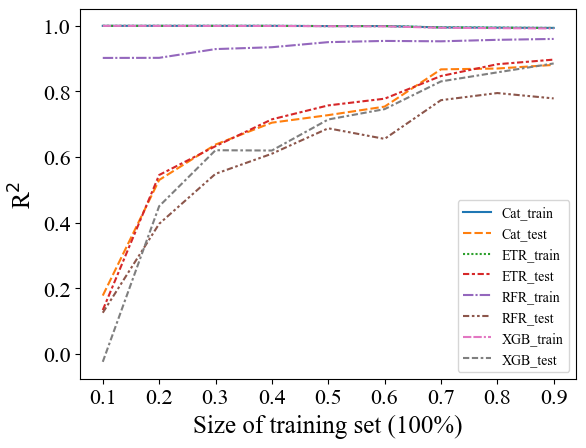

In [8]:
import seaborn as sns
from pathlib import Path
sns.lineplot(data=D_1.T)
plt.yticks(fontsize=16,fontname='Times New Roman')
plt.xticks(fontsize=16,fontname='Times New Roman')
plt.xlabel('Size of training set (100%)',fontsize=18,font=Path('..\TimesNewRoman.ttf'))
plt.ylabel('R$^2$',fontsize=18,font=Path('..\TimesNewRoman.ttf'))
# plt.text(4,0.1,'R$^2$',fontsize=15,font=Path('..\TimesNewRoman.ttf'))
plt.legend(prop=Path('..\TimesNewRoman.ttf'))
plt.show()

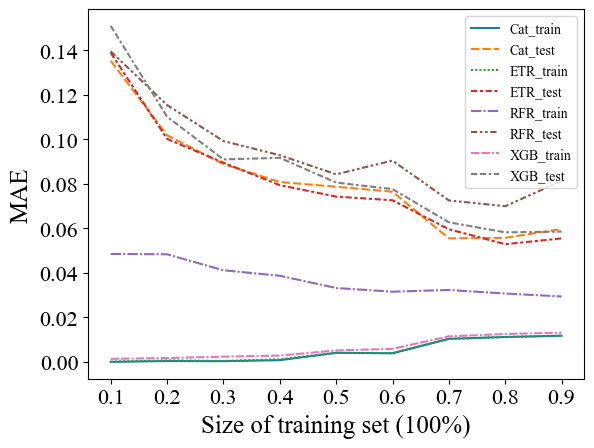

In [9]:
import seaborn as sns
sns.lineplot(data=D_2.T)
plt.yticks(fontsize=16,fontname='Times New Roman')
plt.xticks(fontsize=16,fontname='Times New Roman')
plt.xlabel('Size of training set (100%)',fontsize=18,font=Path('..\TimesNewRoman.ttf'))
plt.ylabel('MAE',fontsize=18,font=Path('..\TimesNewRoman.ttf'))
plt.legend(prop=Path('..\TimesNewRoman.ttf'))
plt.show()